# Decision Tree pour la prédiction de la qualité du vin

In [12]:
### Importation des librairies

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

### Chargement des données

In [14]:
wine_data = pd.read_csv('../WineQT.csv')

# Calcul de la matrice de corrélation
corr_wine_data = wine_data.drop("Id", axis=1).corr(method="pearson")

### Aperçu des 5 premières lignes

In [15]:
wine_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

### Sélection des features et de la target

In [16]:
selected_features = ['alcohol', 'sulphates','citric acid'] # Ces valeurs ont été choisi car ce sont celle qui ont le plus d'influence sur la qualité du vin d'après la matrice de corrélation
X = wine_data[selected_features]
wine_data['quality_label'] = wine_data['quality'].apply(lambda x: 'bad quality' if x <= 5 else 'good quality')
y = wine_data['quality_label']

### Division des données en données d'entrainement et données de test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

### Créer et entrainer un modèle de Decision Tree

In [18]:
model = DecisionTreeClassifier(random_state=0, max_depth=6)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

### Prédiction sur les données de test

In [19]:
y_pred = model.predict(X_test)

### Evaluation du modèle

In [20]:
print("Rapport de classification :")
print("Precision du modèle :" , accuracy_score(y_test, y_pred))

Rapport de classification :
Precision du modèle : 0.75


### Matrice de corrélation

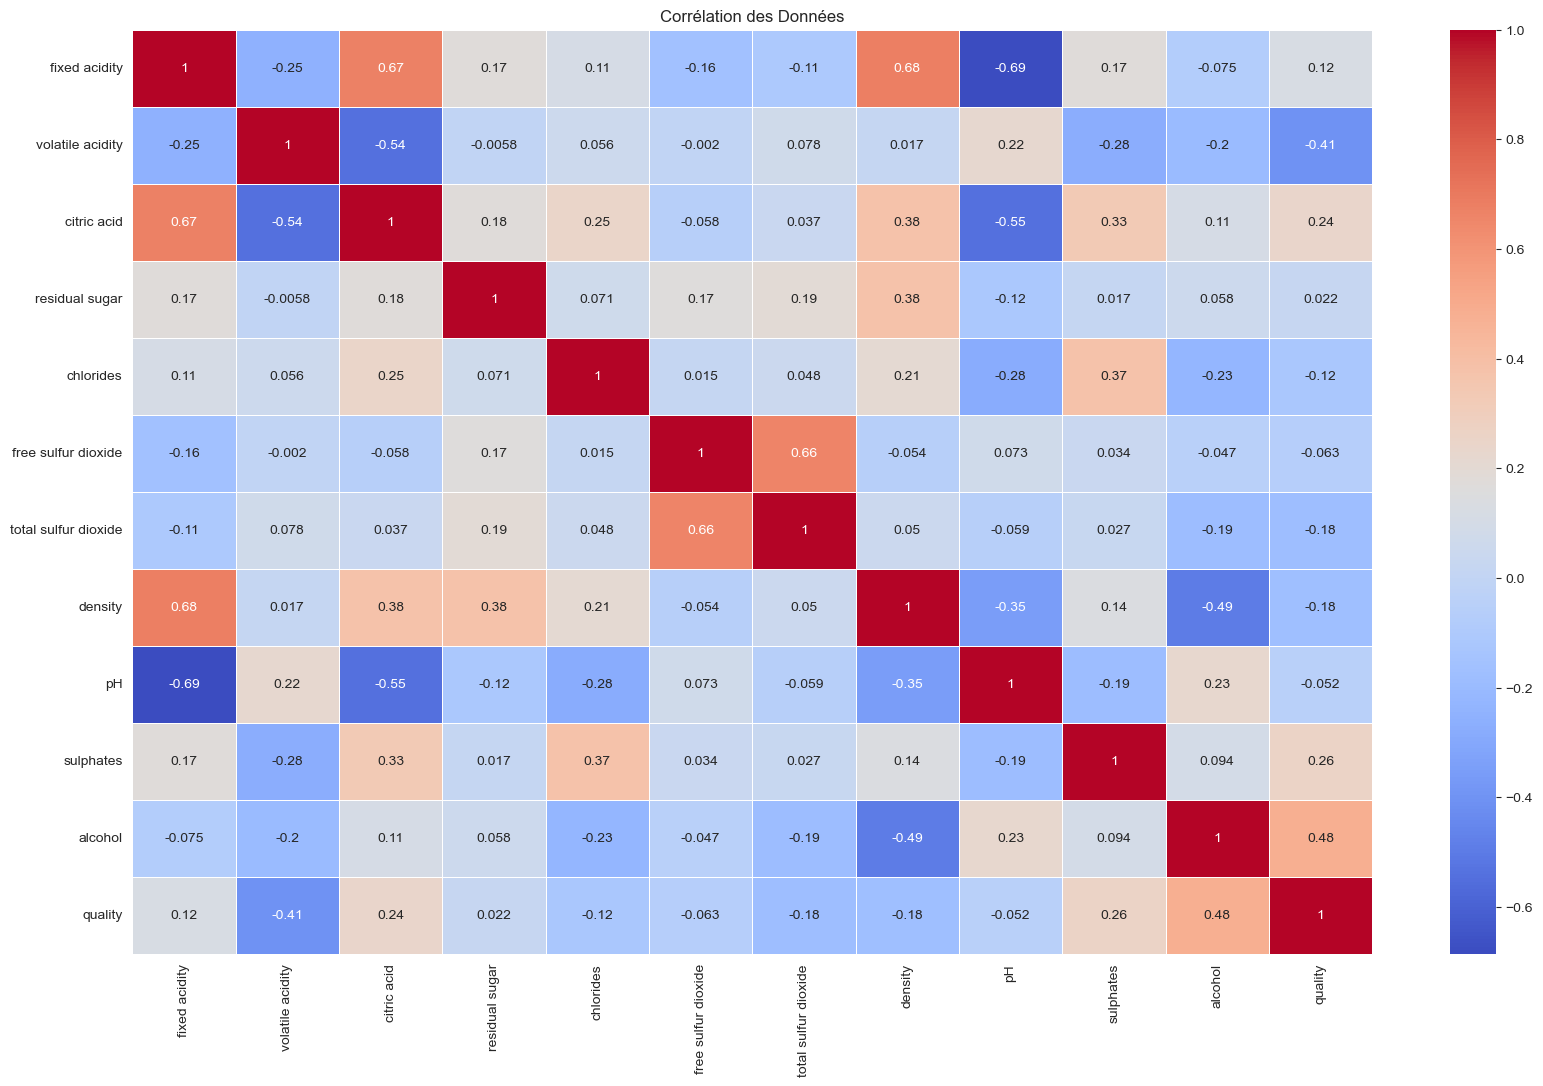

In [21]:
plt.figure(figsize=(20, 12))
sns.heatmap(corr_wine_data, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Corrélation des Données')
plt.show()
# La correlation des données permet de voir les relations entre les différentes variables du dataset
# On peut constater ici que la variables alcool et sulphates sont les plus corrélées avec la qualité du vin
# On peut donc en déduire que ces variables sont les plus importantes pour la prédiction de la qualité du vin

### Visualisation de l'arbre de décision

In [22]:
plt.figure(figsize=(200,150))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=['Bad quality', 'Good quality'])
plt.title("Arbre de décision pour la prédiction de la qualité du vin")
plt.show()